## Loading Data & Libraries

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timezone

# set style of visualization
sns.set_style("darkgrid")
sns.set_palette("RdBu")

In [ ]:
# read data set

path_od = "https://raw.githubusercontent.com/ariefprasetyohadi/Business-Analytics/main/Coffee_Shop_Sales.csv"

# perintah membaca csv
df_od = pd.read_csv(path_od)

In [ ]:
# see top 5 rows

df_od.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,01/01/2023,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01/01/2023,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,01/01/2023,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,01/01/2023,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,01/01/2023,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [ ]:
# see number of rows and columns

df_od.shape

(149116, 11)

In [ ]:
# check missing values

df_od.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [ ]:
# see quick info

df_od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [ ]:
# check duplicated rows

df_od.duplicated().any()

False

In [ ]:
# see unique values in each column

# 1- create new data frame with number of unique value in each column
columnValue = df_od.nunique().reset_index()

# 2- rename column name
columnValue.rename(columns = {"index" : "Column _name", 0 : "Uniue values"}, inplace = True)

# 3- see columns and number of unique values of each
columnValue

,Column _name,Uniue values
0,transaction_id,149116
1,transaction_date,181
2,transaction_time,25762
3,transaction_qty,6
4,store_id,3
5,store_location,3
6,product_id,80
7,unit_price,41
8,product_category,9
9,product_type,29


In [ ]:
# See quick info of numeric data

df_od.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


In [ ]:
# see quick info of categorical data

df_od.describe(include = object)

,transaction_date,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116,149116
unique,181,25762,3,9,29,80
top,6/19/2023,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,1343,41,50735,58416,17183,3076


In [ ]:
# drop some columns such as "product_id", "transaction_id" and "store_id"

df_od.drop(columns = ["transaction_id", "store_id", "product_id"], inplace = True)

## Univariate Analysis & Visualizations 📊📉

In [ ]:
# create function to visualized categorical column using count plot

def count_plot(x_axis = None, y_axis = None, hue = None, rotation = 0, top = None):
    """
    1) input : x_axis, column name, data type must be object or categorical
    3) output : count plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) use bar_label to show frequency of each unique values above each column in graph
    5) top parameter i use it to specify indexes i want to see it
    """
    if x_axis: # if we neet to visualized in x-axis
        order = df_od[x_axis].value_counts().iloc[:top].index

    else : # if we neet to visualized in y-axis
        order = df_od[y_axis].value_counts().iloc[:top].index

    graph = sns.countplot(x = x_axis, y = y_axis, data = df_od, hue = hue, order = order, palette = "RdBu")
    for container in graph.containers:
        graph.bar_label(container)


    plt.xticks(rotation = rotation)
    plt.show()

In [ ]:
# create function that visualized categorical column using pie plot

def pie_plot(column_name, explodeIndex = None):
    """
    1) input : column name, column data type must be object or categorical
    2) explodeIndex, is the index i need to explode it
    2) output : circle chart that shows size of each unique values and percentage
    """
    # Create explode list with zeros of size equal to the number of unique values
    explodeList = [0] * df_od[column_name].nunique()

    # Check and set explodeIndex value
    if explodeIndex is not None:
        explodeList[explodeIndex] = 0.1

    # Create pie plot
    plt.pie(df_od[column_name].value_counts(), labels = df_od[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%",  explode = explodeList)
    plt.show()

### Discovering `transaction_date` column

In [ ]:
# see unique value

df_od["transaction_date"].unique()[:25]

array(['01/01/2023', '01/02/2023', '01/03/2023', '01/04/2023',
       '01/05/2023', '01/06/2023', '01/07/2023', '01/08/2023',
       '01/09/2023', '01/10/2023', '01/11/2023', '01/12/2023',
       '1/13/2023', '1/14/2023', '1/15/2023', '1/16/2023', '1/17/2023',
       '1/18/2023', '1/19/2023', '1/20/2023', '1/21/2023', '1/22/2023',
       '1/23/2023', '1/24/2023', '1/25/2023'], dtype=object)

In [ ]:
df_od['transaction_date']= pd.to_datetime(df_od['transaction_date'])
df_od.dtypes


transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_location              object
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

**🧩📝 Extract some information such as `year , month and day`**

In [ ]:
# add new column year
df_od["year"] = df_od["transaction_date"].dt.year

# add new column month
df_od["month"] = df_od["transaction_date"].dt.month_name()

# add new column day
df_od["day"] = df_od["transaction_date"].dt.day_name()

**Discovering this columns 📉🎛️**

In [ ]:
# see unique values of year column

df_od["year"].unique()

array([2023], dtype=int32)

**📝Sales exclusively from 2023.**

In [ ]:
# see unique values of month column

df_od["month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

<ipython-input-193-ba9a7260142e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = df_od, hue = hue, order = order, palette = "RdBu")


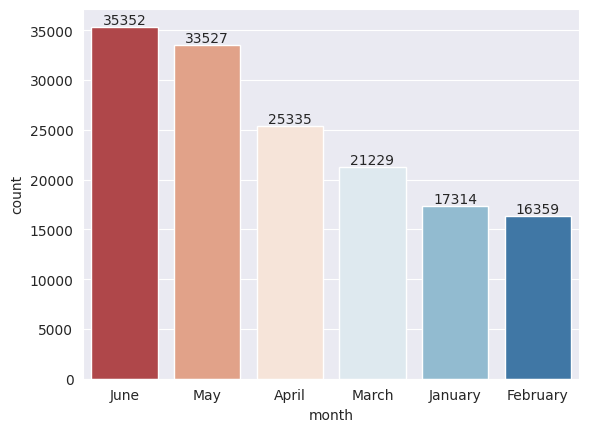

In [ ]:
# see number of transaction in each month

count_plot(x_axis = "month") # call function i create it in cell 12

**📝 Most sales within a six-month period**

In [ ]:
df_od["day"].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

<ipython-input-193-ba9a7260142e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = df_od, hue = hue, order = order, palette = "RdBu")


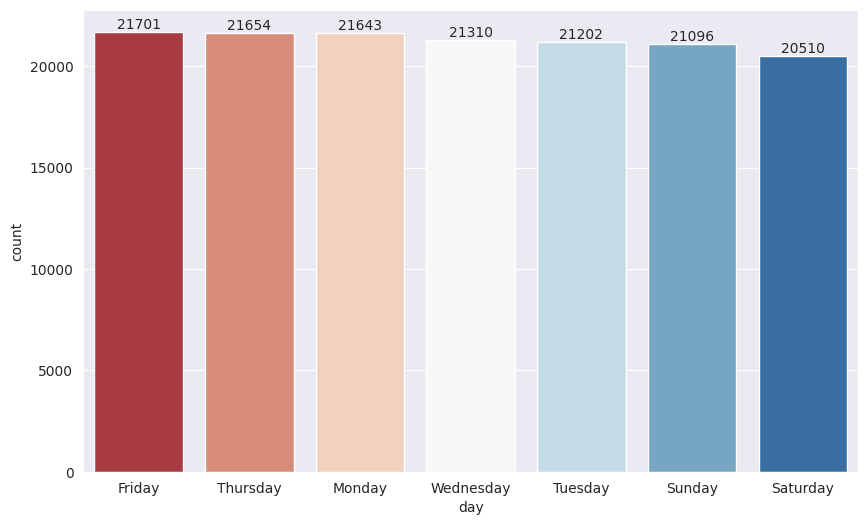

In [ ]:
# see top 5 day of transaction

# set figure size
plt.figure(figsize = (10,6))

# call function i create it in cell 12
count_plot(x_axis = "day")

In [ ]:
# now i will drop  "transaction_date" column

df_od.drop(columns = "transaction_date", inplace = True)

### Discovering `transaction_time` column

In [ ]:
# see unique values

df_od["transaction_time"].unique()[:50]

array(['07:06:11', '07:08:56', '07:14:04', '07:20:24', '07:22:41',
       '07:25:49', '07:33:34', '07:39:13', '07:39:34', '07:43:05',
       '07:44:35', '07:45:51', '07:48:19', '07:52:36', '07:59:58',
       '08:00:18', '08:00:39', '08:11:45', '08:17:27', '08:24:26',
       '08:29:38', '08:31:23', '08:33:08', '08:35:03', '08:41:57',
       '08:52:03', '08:52:32', '08:54:33', '08:56:27', '08:57:46',
       '08:58:55', '09:00:12', '09:00:24', '09:07:13', '09:08:09',
       '09:08:13', '09:10:30', '09:11:06', '09:13:01', '09:13:15',
       '09:14:16', '09:14:17', '09:14:25', '09:14:41', '09:15:09',
       '09:15:13', '09:19:21', '09:19:26', '09:21:08', '09:22:17'],
      dtype=object)

In [ ]:
df_od['transaction_time']= pd.to_datetime(df_od['transaction_time'])
df_od.dtypes

<ipython-input-205-194a7d3a6b19>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_od['transaction_time']= pd.to_datetime(df_od['transaction_time'])


transaction_time    datetime64[ns]
transaction_qty              int64
store_location              object
unit_price                 float64
product_category            object
product_type                object
product_detail              object
year                         int32
month                       object
day                         object
dtype: object

**🧩📝 Extract some information such as `hour`**

In [ ]:
df_od["hour"] = df_od["transaction_time"].apply(lambda x : x.hour)


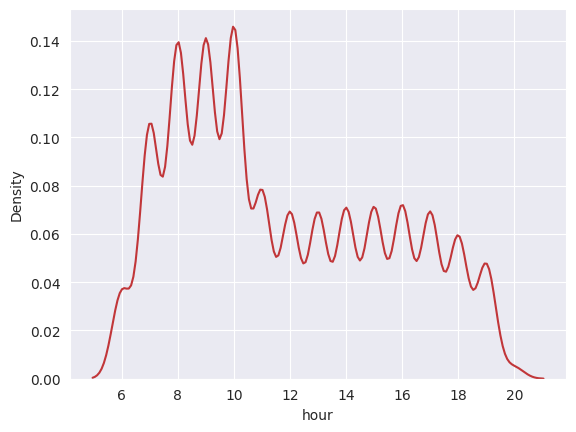

In [ ]:
# see distribution

sns.kdeplot(df_od["hour"])
plt.show()

**📝 Most sales were from 8 am to 11 pm**

In [ ]:
# now i will drop  "transaction_date" column

df_od.drop(columns = "transaction_time", inplace = True)

### Discovering `transaction_qty` column

In [ ]:
# see unique values

df_od["transaction_qty"].unique()

array([2, 1, 3, 4, 8, 6])

<ipython-input-193-ba9a7260142e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = df_od, hue = hue, order = order, palette = "RdBu")


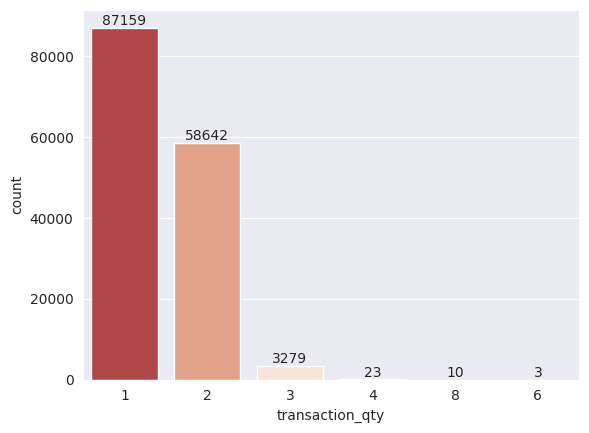

In [ ]:
# see number of sales quantity

count_plot(x_axis = "transaction_qty") # call function i create it in cell 12

**📝Most sales were singles followed by 2 lots**

### Discovering `store_location` column

In [ ]:
# see unique values

df_od["store_location"].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

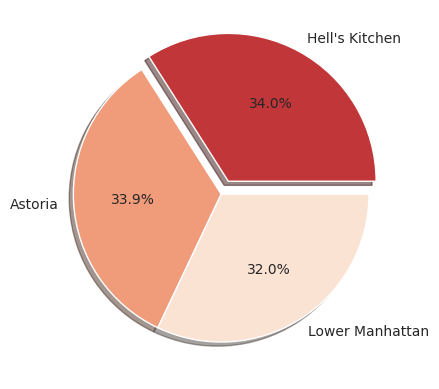

In [ ]:
# see number of sales in each store

pie_plot(column_name = "store_location", explodeIndex = 0)

**📝 The sales rates of the three stores were similar, with the most significant difference observed at the Hell's Kitchen store**

### Discovering `unit_price` column

In [ ]:
# see unique values

df_od["unit_price"].unique()

array([ 3.  ,  3.1 ,  4.5 ,  2.  ,  4.25,  3.5 ,  2.55,  3.75,  2.5 ,
        4.75,  3.25,  4.  ,  2.2 ,  2.45,  0.8 ,  8.95, 21.  , 28.  ,
        6.4 , 19.75, 12.  , 18.  ,  9.5 , 10.  , 20.45,  9.25, 22.5 ,
       14.75,  7.6 , 14.  , 10.95, 13.33, 15.  ,  4.38,  4.06,  5.63,
        4.69, 45.  , 23.  ,  2.1 ,  2.65])

<Axes: ylabel='unit_price'>

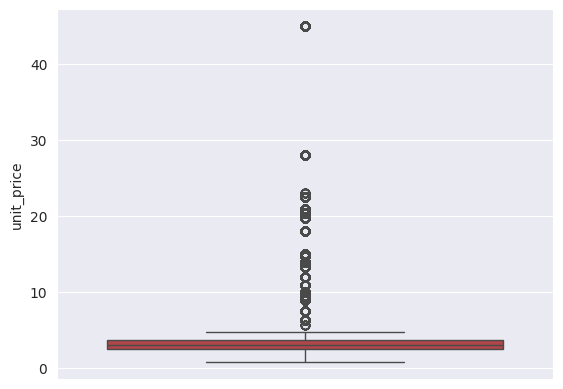

In [ ]:
# see 5 number summary to check outliers

sns.boxplot(y = "unit_price", data = df_od)

**🧩 One might assume the presence of `outliers`, but such variations are expected in different types of coffee**

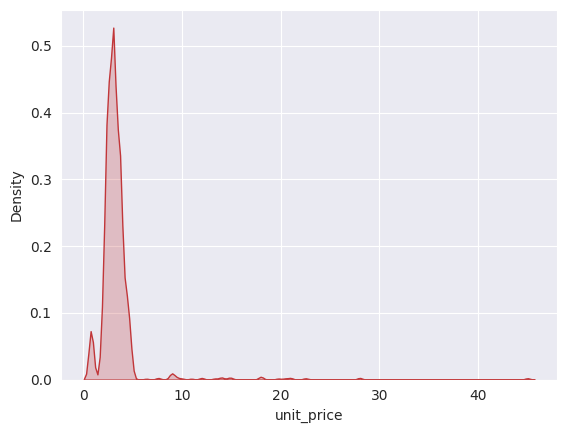

In [ ]:
# see distribution

sns.kdeplot(x = df_od["unit_price"], fill = True)
plt.show()

**🛑📊 We can see :**
   - Price distribution is `positively skewed`, We understand from this that most Coffee have lower prices,while a few Coffee have higher prices

### Discovering `product_category` column

In [ ]:
# see unique values

df_od["product_category"].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

<ipython-input-193-ba9a7260142e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = df_od, hue = hue, order = order, palette = "RdBu")


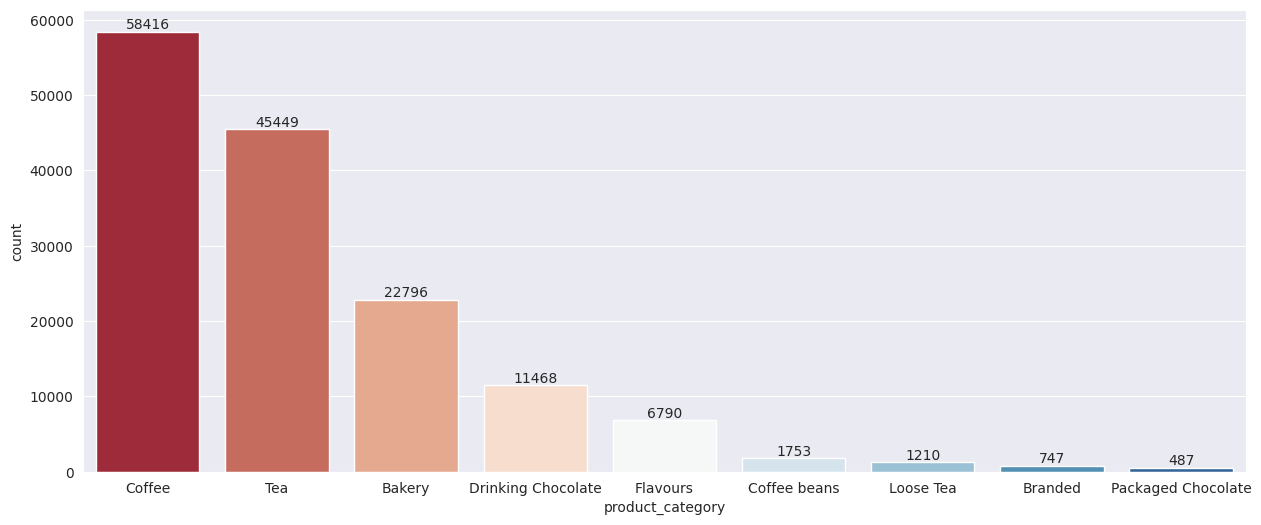

In [ ]:
# see most common category

# set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 12
count_plot(x_axis = "product_category")

**🛑📊 We can see :**
   - it's evident that the three stores offer a wide range of services.
   - `Coffee` stands as the best-selling product.
   - `Tea` also exhibits a high sales rate.

### Discovering `product_type` column

In [ ]:
# see unique values

df_od["product_type"].unique()

array(['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate',
       'Drip coffee', 'Scone', 'Barista Espresso', 'Brewed Black tea',
       'Brewed Green tea', 'Brewed herbal tea', 'Biscotti', 'Pastry',
       'Organic brewed coffee', 'Premium brewed coffee', 'Regular syrup',
       'Herbal tea', 'Gourmet Beans', 'Organic Beans', 'Sugar free syrup',
       'Drinking Chocolate', 'Premium Beans', 'Chai tea', 'Green beans',
       'Espresso Beans', 'Green tea', 'Organic Chocolate', 'Housewares',
       'Black tea', 'House blend Beans', 'Clothing'], dtype=object)

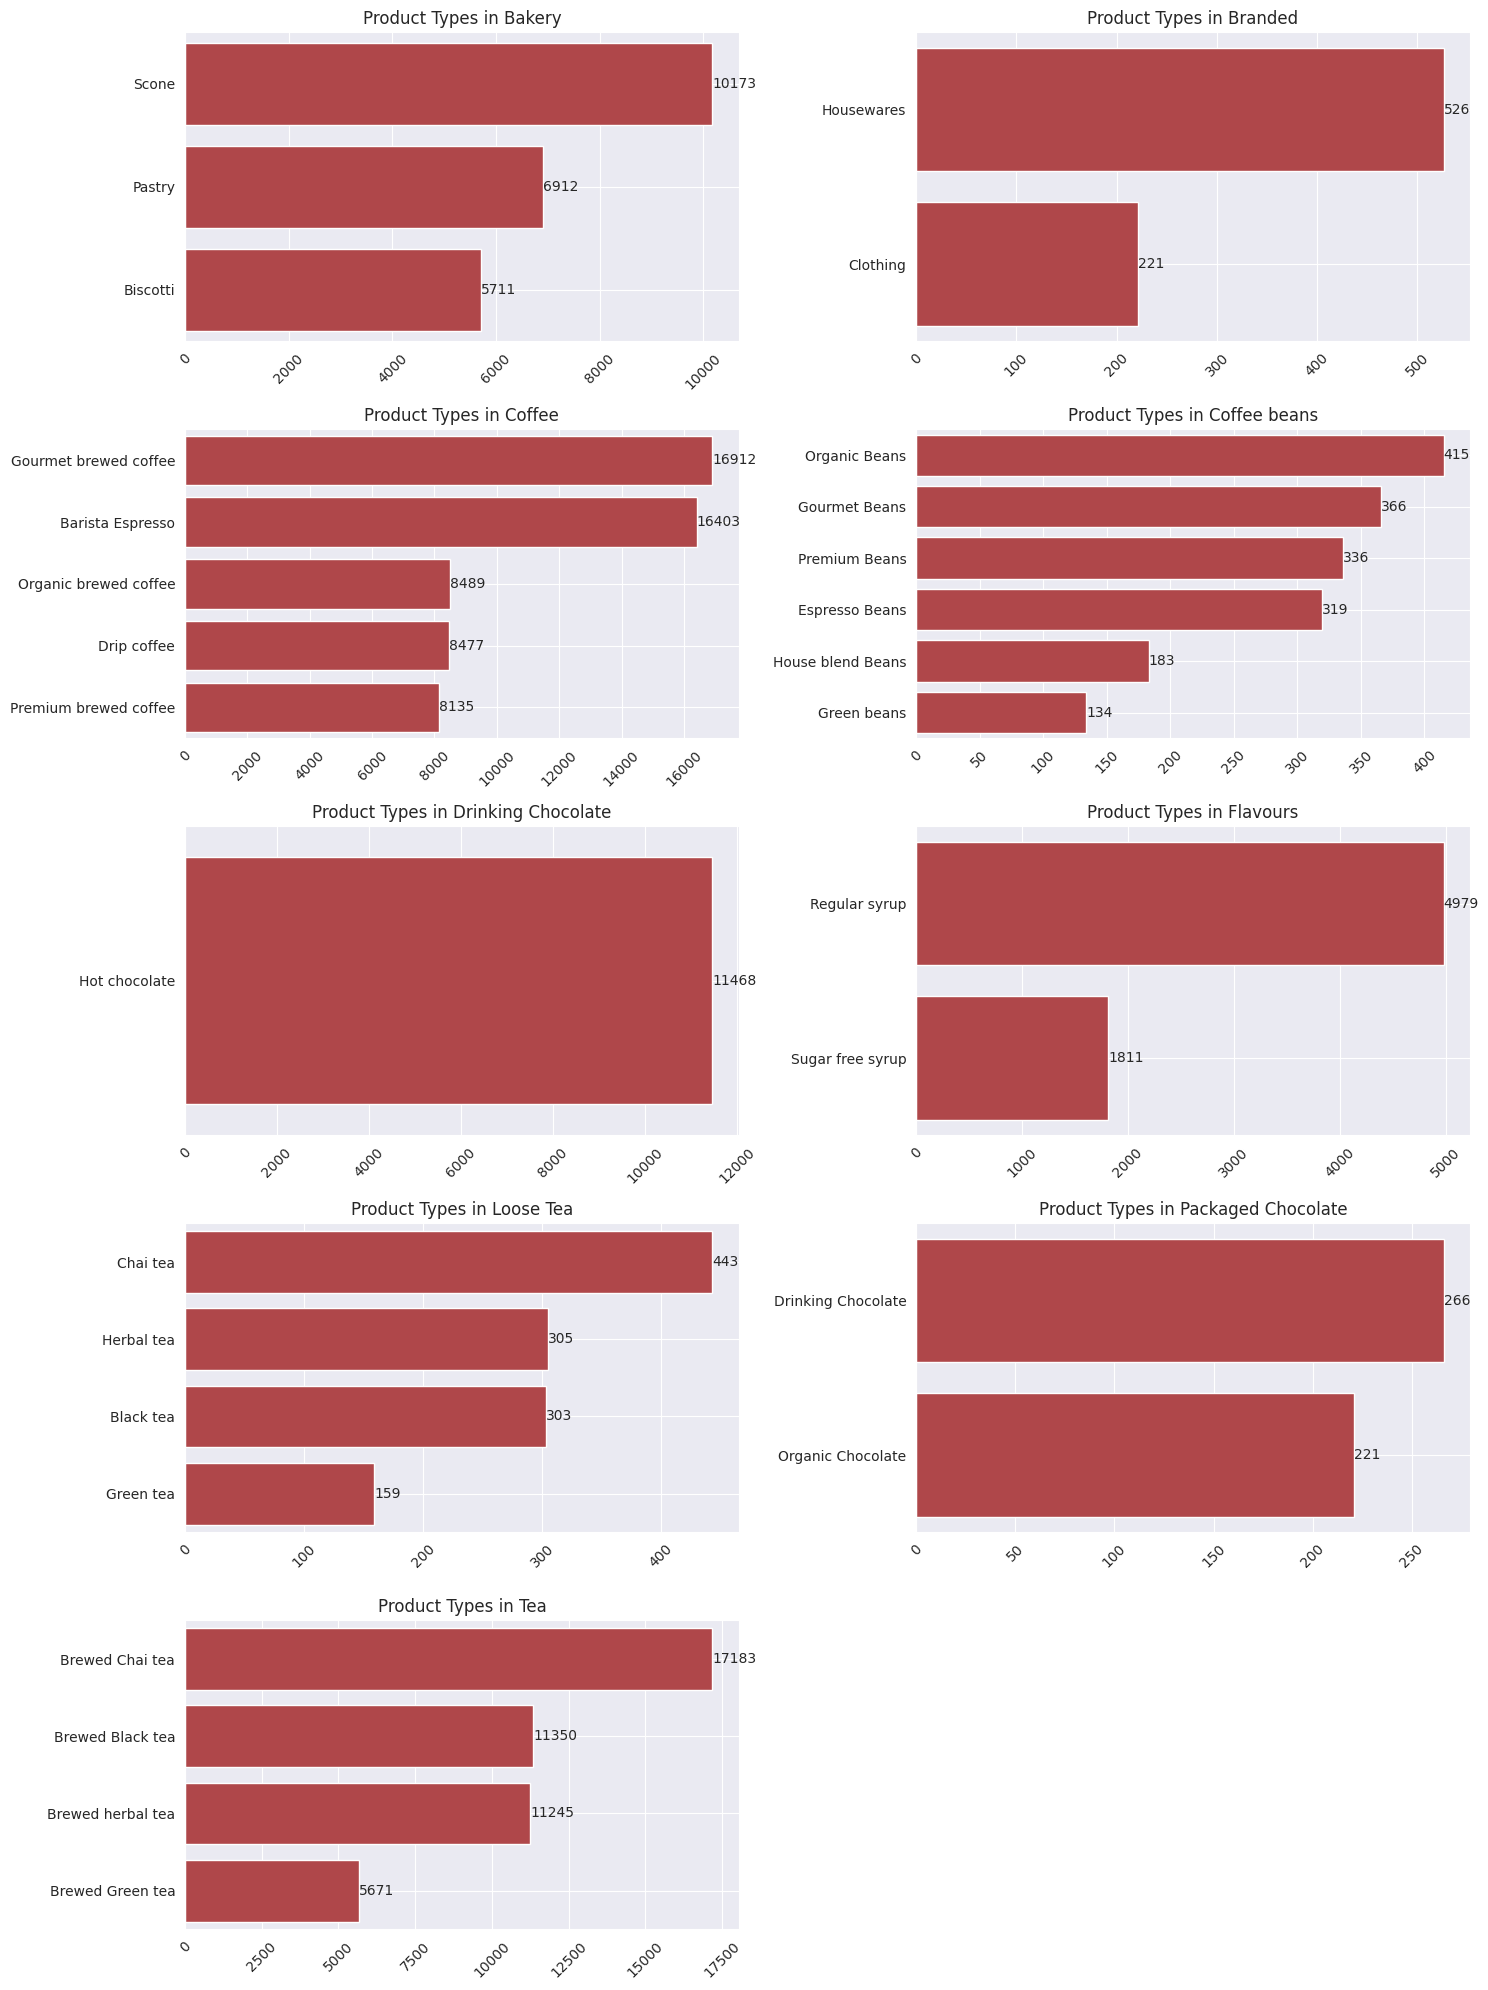

In [ ]:
# Assuming 'counts' is the DataFrame obtained from your groupby operation
counts = df_od.groupby(["product_category", "product_type"]).size().reset_index(name = "count")

# Get unique categories
categories = counts['product_category'].unique()

# Create subplots for each category in a 4x2 grid
fig, axes = plt.subplots(5, 2, figsize = (15, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, category in enumerate(categories):
    # Filter data for each category
    subset = counts[counts['product_category'] == category]

    # Sort the data by 'count' column in descending order
    subset = subset.sort_values('count', ascending = False)

    # Create a bar plot for each category with sorted order
    sns.barplot(x = 'count', y = 'product_type', data = subset, ax = axes[i], order = subset['product_type'])
    axes[i].set_title(f'Product Types in {category}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis = 'x', rotation = 45)
    axes[i].grid(True)

    # Adding bar labels
    for idx, bar in enumerate(axes[i].patches):
        axes[i].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, subset.iloc[idx]['count'], ha = 'left', va = 'center')

# Hide extra subplots if there are fewer categories than subplots
for j in range(len(categories), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


### Discovering `product_detail` column

In [ ]:
# see unique values

df_od["product_detail"].unique()

array(['Ethiopia Rg', 'Spicy Eye Opener Chai Lg', 'Dark chocolate Lg',
       'Our Old Time Diner Blend Sm', 'Oatmeal Scone',
       'Columbian Medium Roast Sm', 'Latte Rg', 'Dark chocolate Rg',
       'Spicy Eye Opener Chai Rg', 'Ethiopia Lg', 'Earl Grey Lg',
       'Ouro Brasileiro shot', 'Serenity Green Tea Lg',
       'Jumbo Savory Scone', 'Lemon Grass Rg',
       'Sustainably Grown Organic Lg', 'Hazelnut Biscotti', 'Cappuccino',
       'Lemon Grass Lg', 'Chocolate Chip Biscotti', 'Peppermint Lg',
       'Chocolate Croissant', 'Latte', 'Brazilian Rg', 'Brazilian Lg',
       'Columbian Medium Roast Rg', 'Morning Sunrise Chai Rg',
       'Morning Sunrise Chai Lg', 'Our Old Time Diner Blend Lg',
       'Sustainably Grown Organic Rg', 'Scottish Cream Scone ',
       'Peppermint Rg', 'English Breakfast Rg',
       'Our Old Time Diner Blend Rg', 'Serenity Green Tea Rg',
       'Brazilian Sm', 'Jamaican Coffee River Sm',
       'Jamaican Coffee River Lg', 'Ginger Biscotti',
       'Tradit

**🛑I decided to `Drop` this column, it's redundant since the same information is presented more effectively in the other columns**

In [ ]:
# drop column

df_od.drop(columns = "product_detail", inplace = True)

In [ ]:
# add new column revenue

df_od["Total revenue"] = df_od["transaction_qty"] * df_od["unit_price"]

In [ ]:
# see sample of data

df_od.sample(5)

,transaction_qty,store_location,unit_price,product_category,product_type,year,month,day,hour,Total revenue
55640,2,Lower Manhattan,2.5,Tea,Brewed Chai tea,2023,April,Saturday,18,5.0
132433,1,Lower Manhattan,4.0,Tea,Brewed Chai tea,2023,June,Friday,15,4.0
92252,1,Hell's Kitchen,3.0,Tea,Brewed Chai tea,2023,May,Friday,8,3.0
89867,1,Astoria,2.5,Tea,Brewed herbal tea,2023,May,Wednesday,7,2.5
91449,1,Lower Manhattan,3.0,Coffee,Barista Espresso,2023,May,Thursday,10,3.0


## Columns Insights📊📉📈

- **Year**, Sales exclusively from 2023.
- **Month**, Most sales within a six-month period
- **Hour**, Most sales were from 8 am to 11 pm
- **Transaction quantity**, Most sales were singles followed by 2 lots
- **Stores**, The sales rates of the three stores were similar, with the most significant difference observed at the `Hell's Kitchen` store
- **Unit price**, Price distribution is `positively skewed`, We understand from this that most Coffee have lower prices,while a few Coffee have higher prices
- **Category :**
     - it's evident that the three stores offer a wide range of services.
     - `Coffee` stands as the best-selling product.
     - `Tea` also exhibits a high sales rate.
- **product type :**
     - In the **Bakery** category, the most sold item is the **scone**
     - In the **Branded** category, the best-selling item is **Housewares**
     - In the **Coffee** category, the best-selling item is **Gourmet brewed coffee**
     - In the **Coffee beans** category, the best-selling item is **Organic Beans**
     - The **Drinking Chocolate** category solely offers **hot chocolate**
     - **Regular syrup** are the top-selling items in the **Flavours** category
     - In the **Loose Tea** category, the best-selling item is **Chai tea**
     - In the **Packaged Chocolate** category, the best-selling item is **Drinking Chocolate**
     - In the **Tea** category, the best-selling item is **Brewed Chai tea**

## Bivariate Analysis & Visualizations 📊📉📈

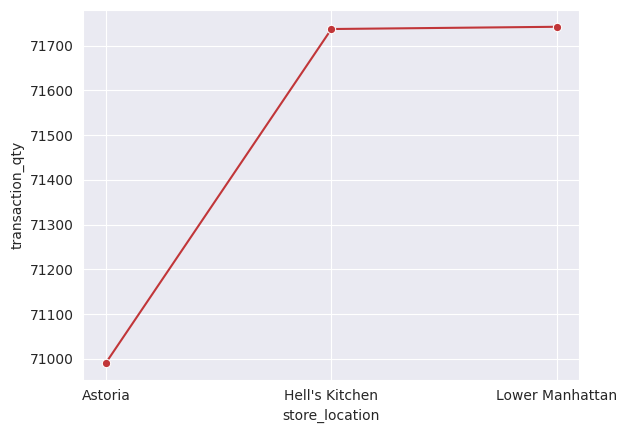

In [ ]:
# stores Vs transaction quantities

# Calculate sum of transaction quantities for each store_location
sum_transaction_qty = df_od.groupby("store_location")["transaction_qty"].sum().reset_index()

# create line plot
sns.lineplot(x = "store_location", y = "transaction_qty", data = sum_transaction_qty, marker = "o")
plt.show()

**🛑 We can see :**
   - The sales ratios for quantities seem to be quite similar across all stores

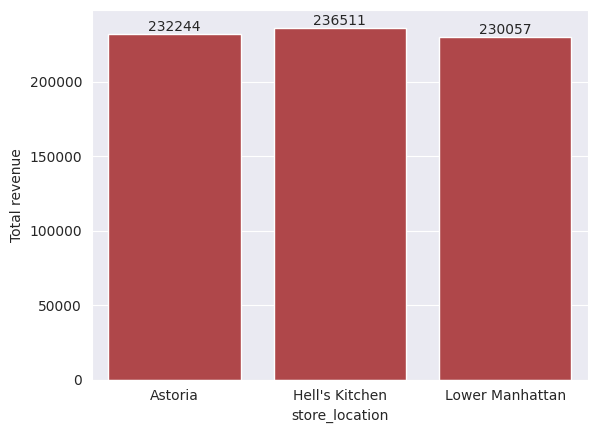

In [ ]:
# Stores Vs Total revenue

# Calculate total revenue for each store_location
revenue = df_od.groupby("store_location")["Total revenue"].sum().reset_index()

# create bar plot
ax = sns.barplot(x = "store_location", y = "Total revenue", data = revenue)

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext = (0, 5), textcoords = 'offset points')

plt.show()

**We can see :**
- The total revenue generated from sales at each store location amounted to $232,243.91 for Astoria, $236,511.17 for `Hell's Kitchen`, and $230,057.25 for `Lower Manhattan`
- **"Hell's Kitchen"** appears to be the best store in terms of revenue.

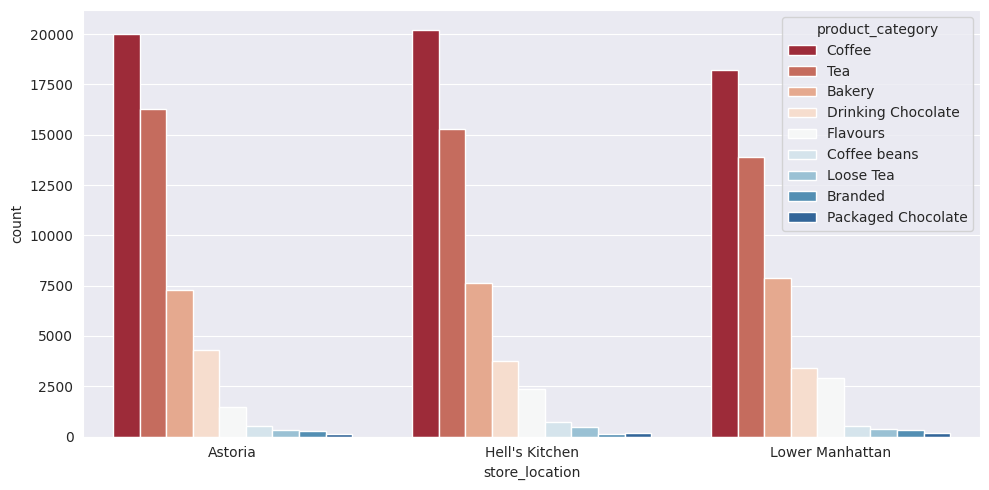

In [ ]:
# Stores VS product categories

# Calculate number of product categories at each store location
popular_products = df_od.groupby('store_location')[['product_category']].value_counts().reset_index(name='count')

# set figure size
plt.figure(figsize=(10, 5))

# Create a bar plot
sns.barplot(x = 'store_location', y = 'count', hue = 'product_category', data = popular_products, palette = "RdBu")

plt.tight_layout()
plt.show()

- **Astoria Store :**
    - The highest selling product category is **Coffee** with a count of **20,025** units
    - Following Coffee, **Tea** stands as the second most popular category with a count of **16,260** units
    - Other categories like Bakery, Drinking Chocolate, Flavours, Coffee beans, Loose Tea, Branded, and Packaged Chocolate have        varying counts, ranging from **7289** to **110** units, in **descending order**
<p>&nbsp;</p>

- **Hell's Kitchen Store :**
    - Similar to Astoria, **Coffee** leads in sales, amounting to **20,187** units
    - **Tea** follows closely as the second most popular category with **15,277** units
    - Other categories, such as Bakery, Drinking Chocolate, Flavours, Coffee beans, Loose Tea, Packaged Chocolate, Branded, and Packaged Chocolate, have counts ranging from **7617** to **119** units  
<p>&nbsp;</p>

- **Lower Manhattan Store :**
    - **Coffee** is again the top-selling category with **18,204** units
    - **Tea** follows with **13,912** units
    - Bakery, Drinking Chocolate, Flavours, Coffee beans, Loose Tea, Branded, Packaged Chocolate have counts ranging from **7890** to **180** units, in **descending order**

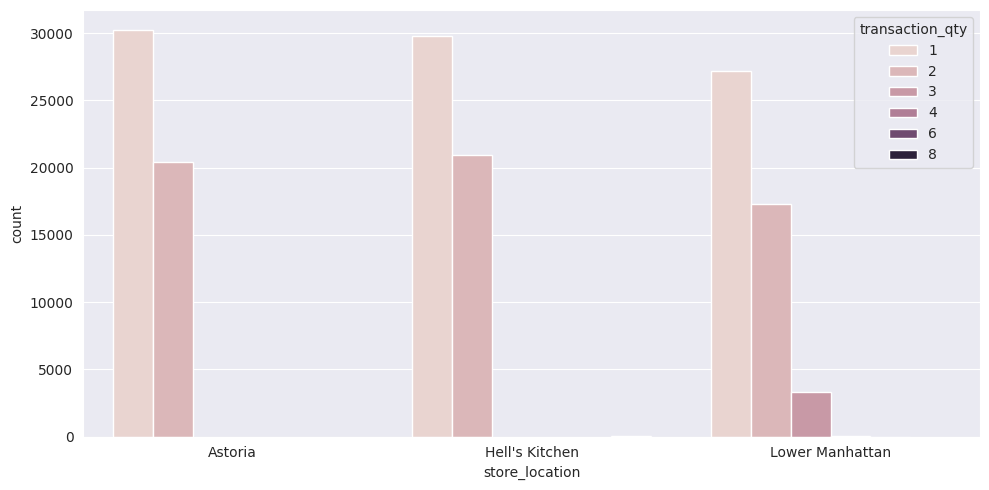

In [ ]:
# Stores VS Most transaction_qty

# grouped 'store_location' and 'transaction_qty' as columns
grouped_data = df_od.groupby("store_location")["transaction_qty"].value_counts().reset_index(name = "count")

# set figure size
plt.figure(figsize=(10, 5))

# Create bar plot
sns.barplot(x = "store_location", y = "count", hue = "transaction_qty", data = grouped_data)

plt.tight_layout()
plt.show()

- **Astoria Store :**
    - The most frequent transaction quantity observed is **1**, with a count of **30,207** instances
    - The second most frequent transaction quantity is **2**, noted **20,392** times
<p>&nbsp;</p>
- **Hell's Kitchen Store:**
    - The most frequent transaction quantity observed is **1**, noted **29,793** times
    - The second most frequent transaction quantity is **2**, observed **20,932** times
    - Additionally, there are **8** transactions with a quantity of **8**
<p>&nbsp;</p>
- **Lower Manhattan Store:**
    - The most frequent transaction quantity observed is **1**, recorded **27,159** times.
    - The second most frequent transaction quantity is **2**, seen **17,318** times.
    - There are occurrences of transaction quantities **3**, **4**, and **6**, but they are less frequent compared to quantities **1** and **2**

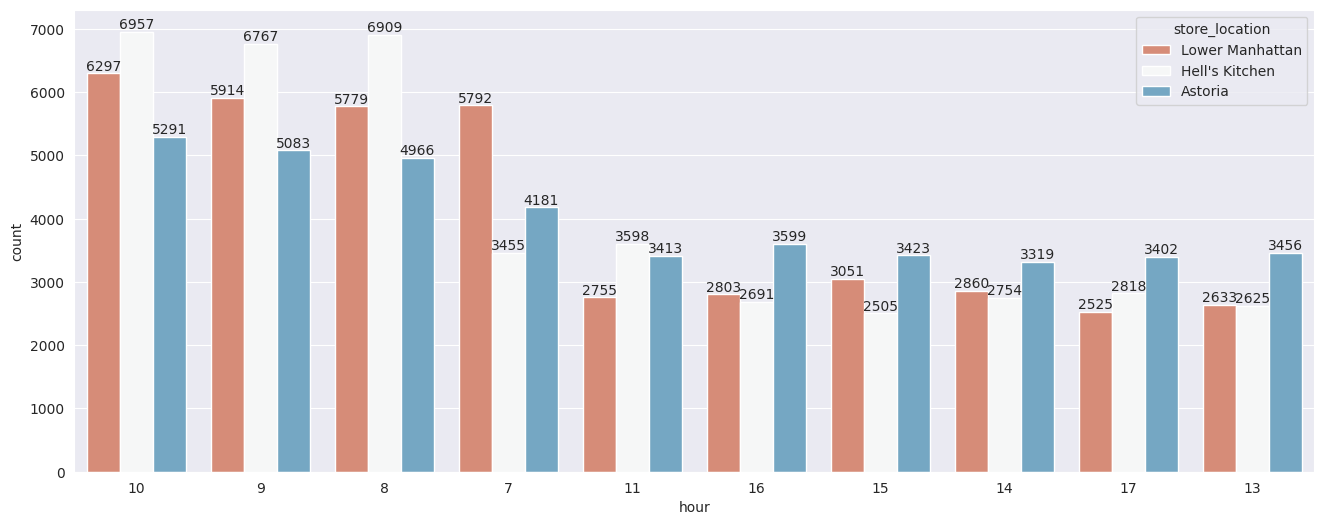

In [ ]:
# Stores VS Hour sales

# set figure size
plt.figure(figsize=(16, 6))

# call function i create it in cell 12
count_plot(x_axis = "hour", hue = "store_location", top = 10)

- **Astoria Store :**
    - Peak hours are from **9 AM** to **10 AM**, and from **4 PM** to **5 PM**, with counts ranging between **5,083** and **5,291** during these periods
    - The least busy hours are from **7 AM** to **8 AM**, with counts ranging between **4,181** and **4,966**
<p>&nbsp;</p>
- **Hell's Kitchen Store :**
    - Busiest hours are from **8 AM** to **10 AM**, with counts ranging between **6,767** and **6,909**
    - The least busy hours are from **6 AM** to **7 AM** and from **6 PM** to **8 PM**
<p>&nbsp;</p>
- **Lower Manhattan Store :**
    - Peak hours are from **9 AM** to **10 AM**, with a count of **6,297**, and from **2 PM** to **3 PM**, with a count of **3,051**
    - The least busy hours are from **7 PM** to **8 PM**, with counts dropping to **75** and **125**

<ipython-input-229-401d7250d6e5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "product_type", y = "revenue", data = category_revenue, palette = "RdBu")


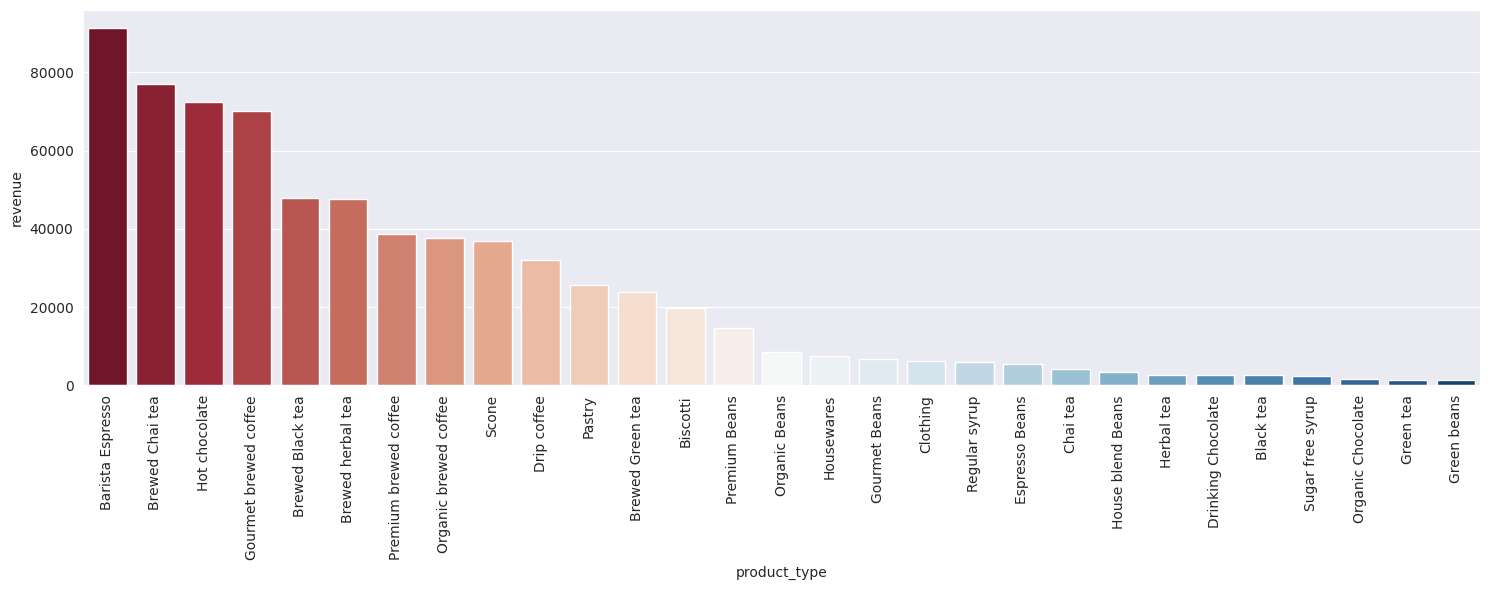

In [ ]:
# Category VS Total revenue

# grouped product_type' and 'Total revenue'
category_revenue = df_od.groupby("product_type")["Total revenue"].sum().reset_index(name = "revenue")

# sort category by revenue
category_revenue = category_revenue.sort_values(by = 'revenue', ascending = False)

# set figure size
plt.figure(figsize = (15,6))

# create bar plot
sns.barplot(x = "product_type", y = "revenue", data = category_revenue, palette = "RdBu")

# set x-axis rotation
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

- **Top Revenue Product Types :**
   - **Barista Espresso** with a revenue of **91,406.20**
   - **Brewed Chai tea** with a revenue of **77,081.95**
   - **Hot chocolate** with a revenue of **72,416.00**
   - **Gourmet brewed coffee** with a revenue of **70,034.60**
   - **Brewed Black tea** with a revenue of **47,932.00**
<p>&nbsp;</p>
- **Lowest Revenue Product Types :**
   - **Organic Chocolate** with a revenue of **1,679.60**
   - **Green tea** with a revenue of **1,470.75**
   - **Green beans** with a revenue of **1,340.00**
<p>&nbsp;</p>
- **Other Observations :**
    - Various products contribute to revenue across different ranges, with a mix of beverages (like **teas, coffees**) and snacks (**biscotti, pastries**).
    - **Coffee-related products**, such as various brews and espresso variants, hold prominent positions in revenue generation.
    - The lowest revenue-generating products are predominantly related to **tea** and specific beverage variants.

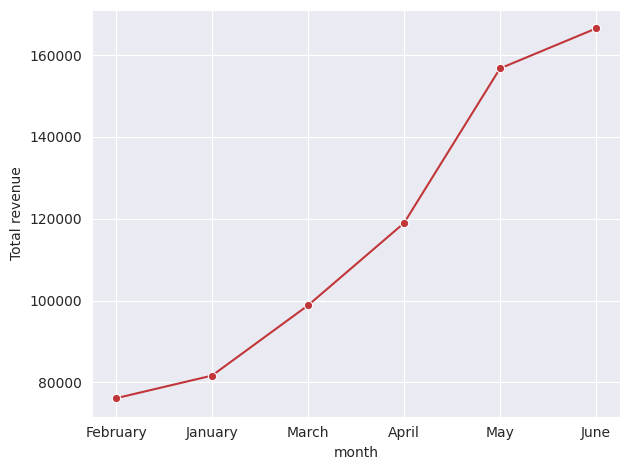

In [ ]:
# Month VS revenue

# Grouping by month and summing the revenue
monthly_revenue  = df_od.groupby("month")["Total revenue"].sum().reset_index().sort_values(by = "Total revenue")

# create line plot
sns.lineplot(x = "month", y = "Total revenue", data = monthly_revenue , marker = "o")

plt.tight_layout()
plt.show()

- **We can see 🎛️📊 :**
    - **Jun**e had the highest total revenue, reaching **166,485.88**, making it the most profitable month.
    - **May** followed closely behind with a total revenue of **156,727.76**, indicating strong performance.
    - **Apri**l and **March** also performed well, generating revenues of **118,941.08** and **98,834.68**, respectively.
    - **January** and **February** had comparatively lower revenue figures at **81,677.74** and **76,145.19**, respectively.